In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [50]:
file = 'hourly_data/AAPL_hourly.csv' # Price,Close,High,Low,Open,Volume
df = pd.read_csv(file, skiprows=2)
df.columns = ['Datetime', 'Close', 'High', 'Low', 'Open', 'Volume']
print(df.head())

                    Datetime       Close        High         Low        Open  \
0  2024-04-22 13:30:00+00:00  165.369995  166.229996  165.229996  165.750000   
1  2024-04-22 14:30:00+00:00  165.395004  165.539993  164.770004  165.369995   
2  2024-04-22 15:30:00+00:00  165.619995  165.869995  165.374802  165.399994   
3  2024-04-22 16:30:00+00:00  166.274994  166.285004  165.434998  165.614197   
4  2024-04-22 17:30:00+00:00  166.854996  167.259995  166.270004  166.270004   

    Volume  
0  9753629  
1  4939703  
2  4178724  
3  3510757  
4  5021219  


In [67]:
def plot_candlestick(df, title='Daily Candlestick Chart', date_range=None, moving_average=None):
    df_new = df.copy()

    # Convert to datetime and remove timezone
    df_new['Datetime'] = pd.to_datetime(df_new['Datetime']).dt.tz_convert(None)
    df_new.set_index('Datetime', inplace=True)

    # Filter by date range if provided
    if date_range is not None:
        start_date = pd.to_datetime(date_range[0])
        end_date = pd.to_datetime(date_range[1])
        df_new = df_new.loc[start_date:end_date]

    # Resample to daily frequency
    df_daily = df_new.resample('D').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }).dropna()

    # Convert to float
    df_daily = df_daily.astype(float)

    # Plot with or without moving average
    if moving_average is not None:
        df_daily['MA'] = df_daily['Close'].rolling(window=moving_average).mean()
        apds = [mpf.make_addplot(df_daily['MA'], color='orange', width=0.7)]
        mpf.plot(df_daily, type='candle', volume=True, title=title, style='yahoo', addplot=apds)
    else:
        mpf.plot(df_daily, type='candle', volume=True, title=title, style='yahoo')


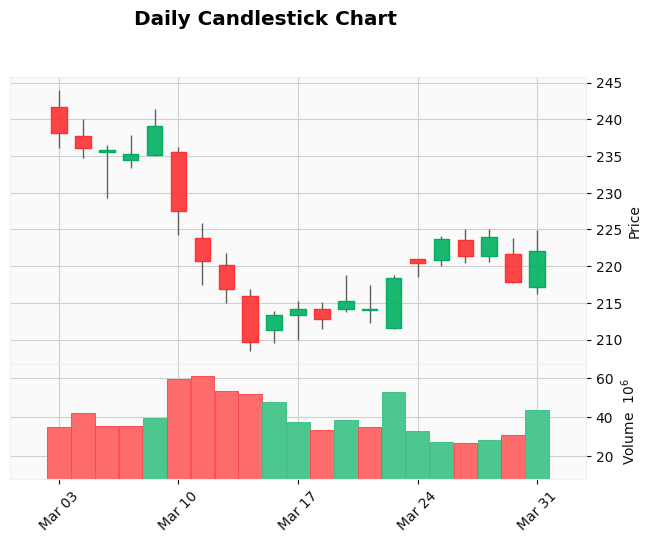

In [70]:
plot_candlestick(df, date_range=["2025-03-01 00:00:00", "2025-04-01 00:00:00"])